Summary of magicblast


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
PROJECT_CODE='PRJNA606875'
BASE_PATH = f'/mnt/1TB_0/Data/Assembly/{PROJECT_CODE}/'

#SRA='SRR11092060'
#path=f'/mnt/1TB_0/Data/Assembly/{PRJ}/{SRA}/magic_blast/'
#dbname='gsa_bsl_nt_db'
dbname='nt'
kmer='k141'


#magicblast on contigs
magic_blast_sam_tail=f'_{dbname}_final_contigs_magicBLAST.sam'
f_contigs_file_tail=f'_{dbname}_magic_blast_asc_contigs.txt'
GIS,ACCESSIONS,TITLES=None,None,None

In [4]:
def read_gi_accession_title(gi_asc_file):
    gis=[]
    accessions=[]
    titles=[]
    with open(gi_asc_file, 'r') as infile:
        data = infile.readlines()
        for i in data:
            output=i.split(' ',2)
            gis.append(output[0])
            accessions.append(output[1])
            titles.append(output[2])
    return gis, accessions, titles
    

In [5]:
def get_accession(s):
    accession = None
    row= None
    chunks = s.split("\t")
    if len(chunks)>2:
        try:
            int(chunks[2])
        except:
            accession = chunks[2]
            row = s
    return accession, row

In [6]:
def write_contigs(sra, magic_blast_sam_tail, f_contigs_file_tail):
    path = BASE_PATH+sra+'/magic_blast/'
    f_contigs= open(path+sra+f_contigs_file_tail, 'w')
    accessions = []
    fpath=path+sra+magic_blast_sam_tail
    print(f'input: {fpath}, saving contigs: {f_contigs}')
    with open(fpath) as f:   
        for line in f:
            if line.startswith(kmer) or line.startswith('>'+kmer):
                accession, row=get_accession(line)
                if row is not None:
                    accessions.append(accession)
                    f_contigs.write(f'{row}')
        print(f'number accession identified in sam file: {len(accessions)}')
    return accessions

In [7]:
def get_accession_dat(values, dbname='nt'):
    vdats=[]
    #print(f'dbname: {dbname}, accessions: {len(values)}')
    for v in values:
        if v.strip() in ACCESSIONS:
            idx=ACCESSIONS.index(v)
            vdats.append(v+' '+TITLES[idx].replace('\n',''))
        elif v.strip() in GIS:
            idx=GIS.index(v)
            vdats.append(ACCESSIONS[idx]+' '+TITLES[idx].replace('\n',''))
        else:
            print(f'{v} not found')
            try:
                vdat=!blastdbcmd -db $dbname -entry $v
                vdats.append(vdat[0].split(',')[0])
            except Exception as e:
                print(e)
                vdats.append(v)
    return vdats

In [8]:
#vdat=!blastdbcmd -db $dbname -entry KY063616.1
#vdat[0]

In [9]:
dbname

'nt'

In [10]:
#all_accessions=!blastdbcmd -db $dbname -entry all

In [11]:
#accession_titles=[a for a in all_accessions if a.startswith('>')]

In [12]:
#with open("gsa_bsl_nt_db_titles.txt", 'w') as f:
#    f.write('\n'.join(accession_titles))

In [13]:
def workflow(sra, dbname):
    try:
        accessions = write_contigs(sra, magic_blast_sam_tail, f_contigs_file_tail)
        values, counts = np.unique(accessions, return_counts=True)
        #print(f'{len(values)}, {accessions[0]}, {values[0]}')
        vdats=get_accession_dat(values, dbname)
        return vdats, counts
    except FileNotFoundError as e:
        return None, None

### All SRA's

In [14]:
#sra_list=['SRR10168373','SRR10168374','SRR10168375', 'SRR10168376','SRR10168377', 'SRR10168378',\
#      'SRR10168379','SRR10168380','SRR10168381','SRR10168382','SRR10168383','SRR10168384',\
#     'SRR10168385','SRR10168386','SRR10168387','SRR10168388','SRR10168389','SRR10168390',\
#     'SRR10168391','SRR10168392','SRR10168393']

sra_list=['SRR11093266','SRR11093267','SRR11093268','SRR11093269','SRR11093270','SRR11093271','SRR11093265']

In [15]:
def write_summary(sra, dvdat):
    path = BASE_PATH+sra+'/magic_blast/'
    print(f'sra {sra}')
    #print(f'keys {dvdat.keys()}')
    #print(f'values {dvdat.values()}')
    print('\n')
    for d, v in dvdat.items():
        if sra==d:
            with open(path+f'{d}_{dbname}_{kmer}_magicBLAST_summary.txt', 'w') as f:
                f.write(f'SRA: {d}, database: {dbname}\n')
                for i, s in enumerate(v[0]):
                    if (s.find('command not found')==-1):
                        f.write(f'{s}, count: {v[1][i]}\n')


In [16]:
def set_accessions():
    global GIS
    global ACCESSIONS
    global TITLES
    GIS,ACCESSIONS,TITLES=read_gi_accession_title('/mnt/1TB_ssd/Data/BLAST/nt.gi_taxid.tsv')

In [17]:
def process_summary():
    dvdat={}
    set_accessions()
    for sra in sra_list:
        vdats, counts= workflow(sra, dbname)
        if vdats is not None:
            dvdat[sra]=(vdats, counts)
            write_summary(sra, dvdat)
    

In [18]:
process_summary()

input: /mnt/1TB_0/Data/Assembly/PRJNA606875/SRR11093266/magic_blast/SRR11093266_nt_final_contigs_magicBLAST.sam, saving contigs: <_io.TextIOWrapper name='/mnt/1TB_0/Data/Assembly/PRJNA606875/SRR11093266/magic_blast/SRR11093266_nt_magic_blast_asc_contigs.txt' mode='w' encoding='UTF-8'>
number accession identified in sam file: 549
sra SRR11093266


input: /mnt/1TB_0/Data/Assembly/PRJNA606875/SRR11093267/magic_blast/SRR11093267_nt_final_contigs_magicBLAST.sam, saving contigs: <_io.TextIOWrapper name='/mnt/1TB_0/Data/Assembly/PRJNA606875/SRR11093267/magic_blast/SRR11093267_nt_magic_blast_asc_contigs.txt' mode='w' encoding='UTF-8'>
number accession identified in sam file: 2056
sra SRR11093267


input: /mnt/1TB_0/Data/Assembly/PRJNA606875/SRR11093268/magic_blast/SRR11093268_nt_final_contigs_magicBLAST.sam, saving contigs: <_io.TextIOWrapper name='/mnt/1TB_0/Data/Assembly/PRJNA606875/SRR11093268/magic_blast/SRR11093268_nt_magic_blast_asc_contigs.txt' mode='w' encoding='UTF-8'>
number accessio

### Stats

In [19]:
def get_asc_descr_count(sra): 
    accessions=[]
    descriptions=[]
    counts=[]
    path = BASE_PATH+sra+'/magic_blast/'
    with open(path+f'{sra}_{dbname}_{kmer}_magicBLAST_summary.txt', 'r') as f:
        lines = [line.rstrip('\n') for line in f]
        total=len(lines)-1
        for line in lines:
            if not 'database:' in line: #ignore header
                asc=line.split(None, 1)[0]
                title=line.split(None, 1)[1].split(', count:')[0]
                count=line.split(None, 1)[1].split(', count:')[1]
                accessions.append(asc)
                descriptions.append(title)
                counts.append(count)
    return accessions, descriptions, counts, total


In [20]:
def get_indexes(substr, str_list):
    index_list = []
    i = 0
    for e in str_list:
        if substr in e.lower():
            index_list.append(i)
        i +=1
    return index_list

In [30]:
def get_descr(sra):
    accessions, descriptions, counts, total=get_asc_descr_count(sra)
    print(f'sra: {sra}, accessions: {len(accessions)}, descriptions: {len(descriptions)}, counts: {len(counts)}, total: {total}')
    if total>0:
        human = [s for s in descriptions if 'human' in s.lower()]
        homo_sapiens = [s for s in descriptions if 'homo sapiens' in s.lower()]
        h_sapiens = [s for s in descriptions if 'h.sapiens' in s.lower()]
        human_contigs = human+homo_sapiens+h_sapiens
        pangolin = [s for s in descriptions if 'manis javanica' in s.lower()]
        pangolin_p = [s for s in descriptions if 'manis pentadactyla' in s.lower()]
        pangolin=pangolin+pangolin_p
        mouse = [s for s in descriptions if 'mus musculus' in s.lower()]
        vector= [s for s in descriptions if 'vector' in s.lower()]
        pig = [s for s in descriptions if 'sus scrofa' in s.lower()]
        cat = [s for s in descriptions if 'felis catus' in s.lower()]
        tiger = [s for s in descriptions if 'panthera tigris' in s.lower()]
        dog = [s for s in descriptions if 'canis lupus' in s.lower()]
        virus = [s for s in descriptions if 'virus' in s.lower()]
        pipistrellus = [s for s in descriptions if 'pipistrellus' in s.lower()]
        rhinolophus = [s for s in descriptions if 'rhinolophus' in s.lower()]
        bat = pipistrellus + rhinolophus
        lst = ['human', 'pangolin', 'mouse', 
                'pig', 'cat', 'tiger', 'dog', 'bat', 'virus', 'vector']
        lengths = [len(human_contigs), len(pangolin), len(mouse),  
                len(pig), len(cat), len(tiger), len(dog), len(bat), len(virus), len(vector)]
        final_contigs=BASE_PATH+sra+'/megahit_default/final.contigs.fa'
        with open(final_contigs) as final_contigs_file:
            total_contigs=sum(1 for _ in final_contigs_file)
        res = [int(i) for i in counts]
        total_contigs_matched=sum(res)
        sra_l=[sra]*len(lst)
        fractions_matched = [len(human_contigs)/total_contigs_matched, len(pangolin)/total_contigs_matched, len(mouse)/total_contigs_matched,  
                len(pig)/total_contigs_matched, len(cat)/total_contigs_matched, len(tiger)/total_contigs_matched, len(dog)/total_contigs_matched, len(bat)/total_contigs_matched, len(virus)/total_contigs_matched, len(vector)/total_contigs_matched]
        df = pd.DataFrame(list(zip(sra_l, lst, lengths, fractions_matched)),
                   columns =['SRA','Name', 'count', 'fraction_matched'])
        return df
    return None

In [31]:
sns.set(rc={"figure.figsize":(4, 4)})
def plot_df(df, sra):
    ax=df.plot(x='Name', y='count', kind='bar')
    ax.set_title(sra, fontsize=12)
    fig = plt.gcf()
    fig.savefig(BASE_PATH+sra+'/magic_blast/'+f'{sra}_{dbname}_{kmer}_magicBLAST_species.png', bbox_inches="tight")

sra: SRR11093266, accessions: 34, descriptions: 34, counts: 34, total: 34
sra: SRR11093267, accessions: 100, descriptions: 100, counts: 100, total: 100
sra: SRR11093268, accessions: 10, descriptions: 10, counts: 10, total: 10
sra: SRR11093269, accessions: 223, descriptions: 223, counts: 223, total: 223
sra: SRR11093270, accessions: 11832, descriptions: 11832, counts: 11832, total: 11832
sra: SRR11093271, accessions: 74, descriptions: 74, counts: 74, total: 74
sra: SRR11093265, accessions: 0, descriptions: 0, counts: 0, total: 0


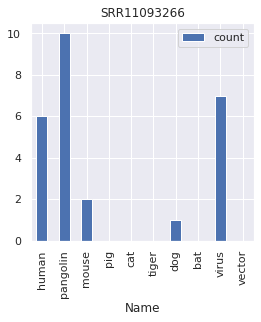

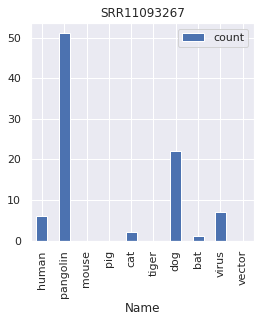

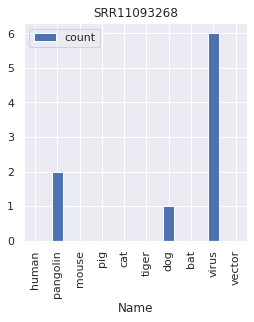

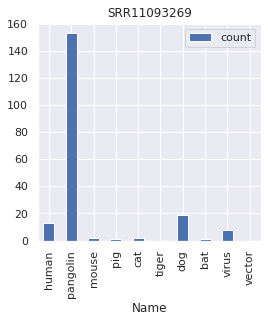

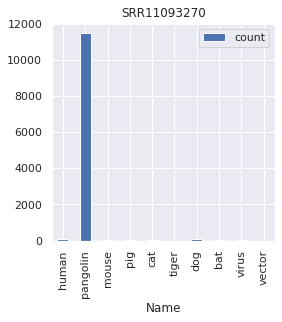

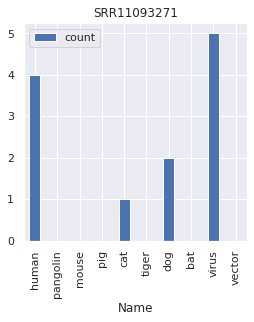

In [36]:
for sra in sra_list:
    try:
        df=get_descr(sra)
        df.to_csv(BASE_PATH+sra+'/magic_blast/'+f'{sra}_{dbname}_{kmer}_magicBLAST_species_df.csv')
        plot_df(df, sra)
    except FileNotFoundError:
        pass
    except AttributeError:
        pass

In [37]:
frames=[]
for i,sra in enumerate(sra_list):
    try:
        df = pd.read_csv(BASE_PATH+sra+'/magic_blast/'+f'{sra}_{dbname}_{kmer}_magicBLAST_species_df.csv')
        x = df.Name.astype('category')
        df['species_uid'] =x.cat.codes
        df['SRA_val'] =df.SRA.str.strip('SRR')
        df['SRA_val'] = pd.to_numeric(df['SRA_val'])
        frames.append(df)
    except FileNotFoundError:
        pass
df_sra = pd.concat(frames)

In [38]:
df_sra.drop(columns=['Unnamed: 0'],inplace=True)

In [39]:
df_sra.head()

,SRA,Name,count,fraction_matched,species_uid,SRA_val
0,SRR11093266,human,6,0.010929,3,11093266
1,SRR11093266,pangolin,10,0.018215,5,11093266
2,SRR11093266,mouse,2,0.003643,4,11093266
3,SRR11093266,pig,0,0.000000,6,11093266
4,SRR11093266,cat,0,0.000000,1,11093266


In [40]:
df_sra.Name.unique()

array(['human', 'pangolin', 'mouse', 'pig', 'cat', 'tiger', 'dog', 'bat',
       'virus', 'vector'], dtype=object)

### All nt database matches

In [41]:
total_dict={}
asc_desc={}
for sra in sra_list:
    accessions, descriptions, counts, total=get_asc_descr_count(sra)
    for asc,desc,cnt in zip(accessions,descriptions, counts):
        if asc in total_dict:
            total_dict[asc]+=int(cnt)
        else:
            total_dict[asc]=int(cnt)
        if asc not in asc_desc:
            asc_desc[asc]=desc

In [42]:
assert len(total_dict)==len(asc_desc)

In [43]:
len(asc_desc)

12148

Print out the 100 most common nt database classification for all contigs in the project

In [44]:
def print_top_n_sp(total_dict, max_num):
    listofTuples = sorted(total_dict.items() , reverse=True, key=lambda x: x[1])
    for i, elem in enumerate(listofTuples):
        if i<max_num:
            print(asc_desc[elem[0]], ": " , elem[1] )
        else:
            break
    

In [45]:
print_top_n_sp(total_dict, max_num=100)

Pangolin coronavirus isolate PCoV_GX-P5L, complete genome :  837
Pangolin coronavirus isolate PCoV_GX-P1E, complete genome :  787
Pangolin coronavirus isolate PCoV_GX-P2V, complete genome :  756
Pangolin coronavirus isolate PCoV_GX-P4L, complete genome :  715
Pangolin coronavirus isolate PCoV_GX-P5E, complete genome :  641
Pangolin coronavirus isolate PCoV_GX-P3B genomic sequence :  478
PREDICTED: Manis javanica proline rich coiled-coil 2A (PRRC2A), mRNA :  15
Manis javanica isolate MP_PG03-UM mitochondrion, complete genome :  14
PREDICTED: Manis javanica LDL receptor related protein 1 (LRP1), transcript variant X3, mRNA :  14
PREDICTED: Manis javanica LDL receptor related protein 1 (LRP1), transcript variant X4, mRNA :  14
Lutra lutra genome assembly, chromosome: 16 :  13
PREDICTED: Manis javanica LDL receptor related protein 1 (LRP1), transcript variant X1, mRNA :  13
PREDICTED: Manis javanica LDL receptor related protein 1 (LRP1), transcript variant X2, mRNA :  13
Manis pentadactyla

### Human

In [46]:
df=df_sra[df_sra['Name'].str.contains('human')]

count                  AxesSubplot(0.125,0.71587;0.168478x0.16413)
fraction_matched    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
dtype: object

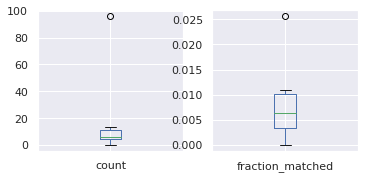

In [47]:
df.drop(columns=['Name'],inplace=True)
sns.set(rc={"figure.figsize":(6, 6)})
df_box=df[['count', 'fraction_matched']]
df_box.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12))

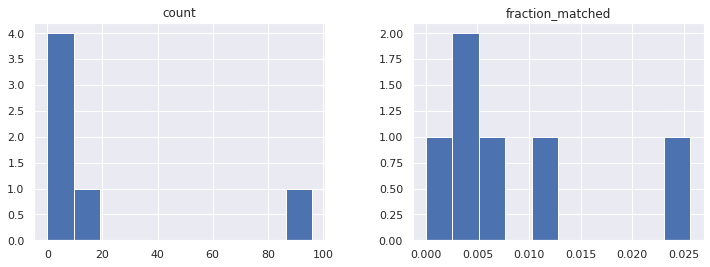

In [48]:
df_box.hist(figsize=(12,4))
plt.show()

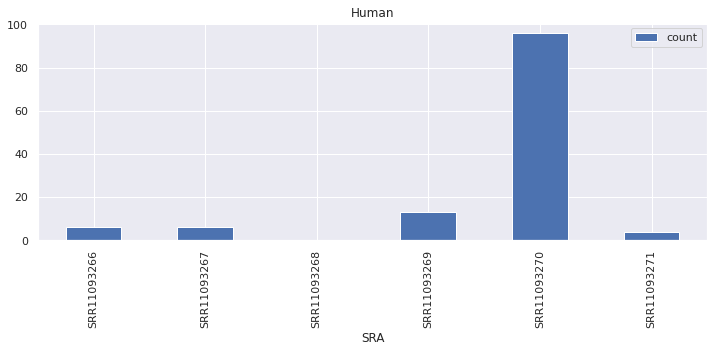

In [49]:
ax=df.plot(x='SRA', y='count', kind='bar',figsize=(12,4))
ax.set_title('Human', fontsize=12)
plt.show()

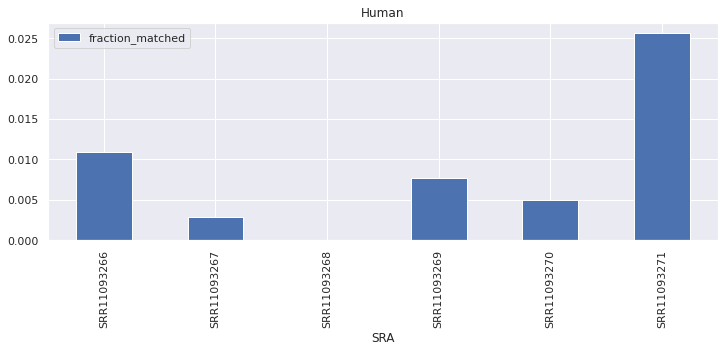

In [50]:
ax=df.plot(x='SRA', y='fraction_matched', kind='bar',figsize=(12,4))
ax.set_title('Human', fontsize=12)
plt.show()

### Pangolin

In [51]:
s_name='pangolin'

In [52]:
df=df_sra[df_sra['Name'].str.contains(s_name)]

count                  AxesSubplot(0.125,0.71587;0.168478x0.16413)
fraction_matched    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
dtype: object

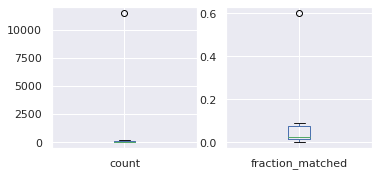

In [53]:
df.drop(columns=['Name'],inplace=True)
sns.set(rc={"figure.figsize":(6, 6)})
df_box=df[['count', 'fraction_matched']]
df_box.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12))

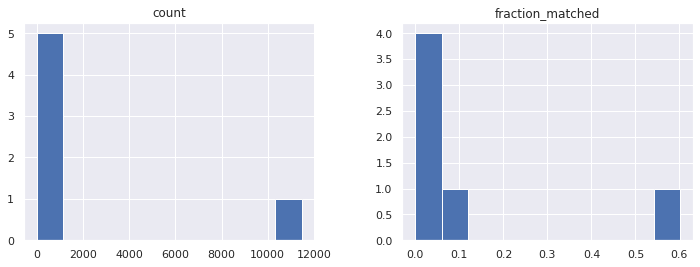

In [54]:
df_box.hist(figsize=(12,4))
plt.show()

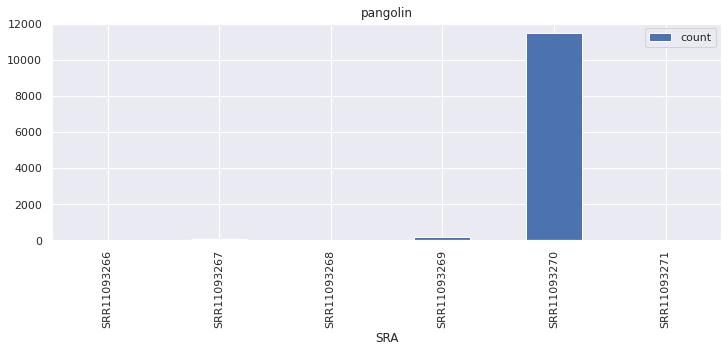

In [55]:
ax=df.plot(x='SRA', y='count', kind='bar',figsize=(12,4))
ax.set_title(s_name, fontsize=12)
plt.show()

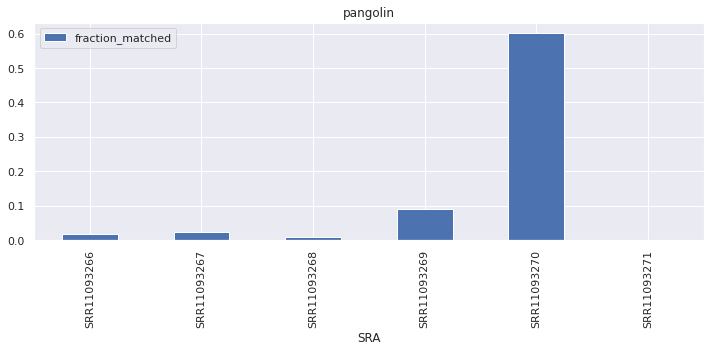

In [56]:
ax=df.plot(x='SRA', y='fraction_matched', kind='bar',figsize=(12,4))
ax.set_title(s_name, fontsize=12)
plt.show()

### Mouse

In [57]:
s_name='mouse'

In [58]:
df=df_sra[df_sra['Name'].str.contains(s_name)]

count                  AxesSubplot(0.125,0.71587;0.168478x0.16413)
fraction_matched    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
dtype: object

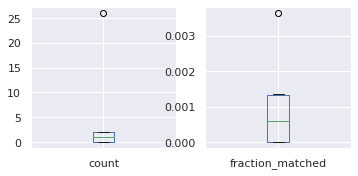

In [59]:
df.drop(columns=['Name'],inplace=True)
sns.set(rc={"figure.figsize":(6, 6)})
df_box=df[['count', 'fraction_matched']]
df_box.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12))

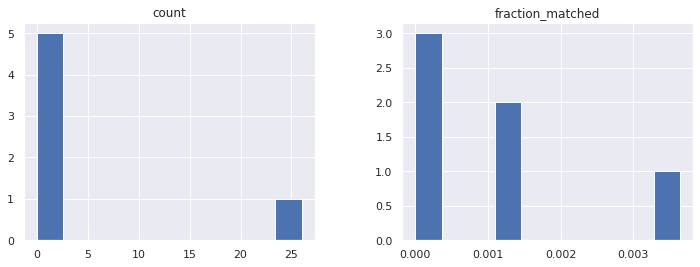

In [60]:
df_box.hist(figsize=(12,4))
plt.show()

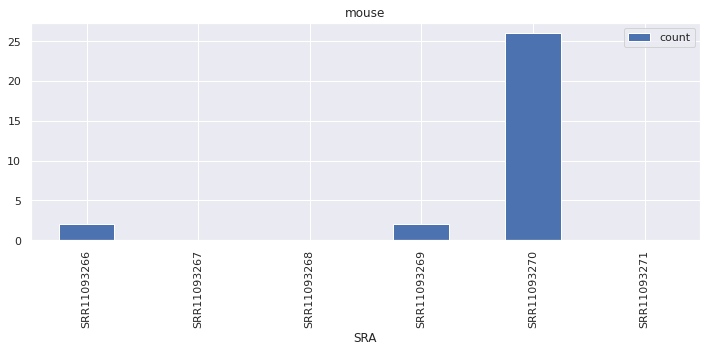

In [61]:
ax=df.plot(x='SRA', y='count', kind='bar',figsize=(12,4))
ax.set_title(s_name, fontsize=12)
plt.show()

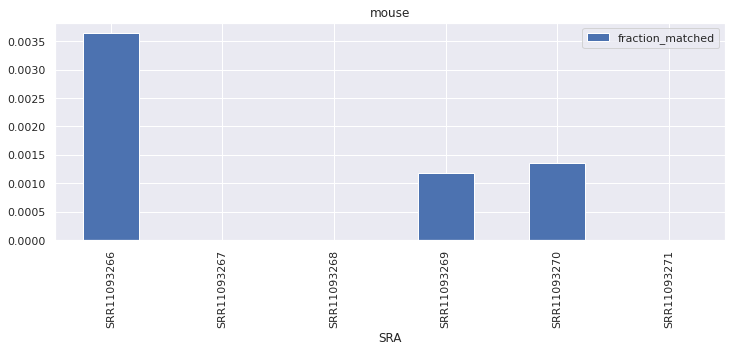

In [62]:
ax=df.plot(x='SRA', y='fraction_matched', kind='bar',figsize=(12,4))
ax.set_title(s_name, fontsize=12)
plt.show()

### virus

In [63]:
s_name='virus'

In [64]:
df=df_sra[df_sra['Name'].str.contains(s_name)]

count                  AxesSubplot(0.125,0.71587;0.168478x0.16413)
fraction_matched    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
dtype: object

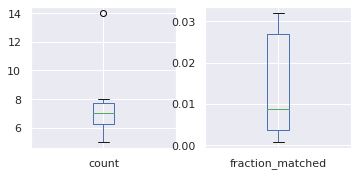

In [65]:
df.drop(columns=['Name'],inplace=True)
sns.set(rc={"figure.figsize":(6, 6)})
df_box=df[['count', 'fraction_matched']]
df_box.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12))

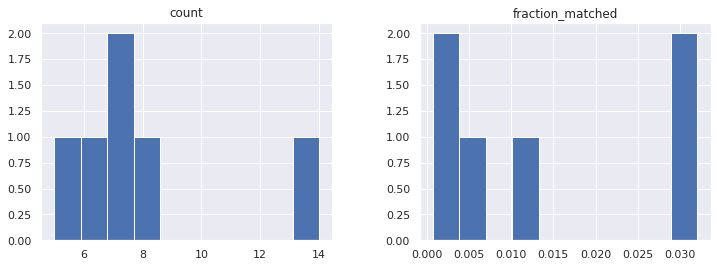

In [66]:
df_box.hist(figsize=(12,4))
plt.show()

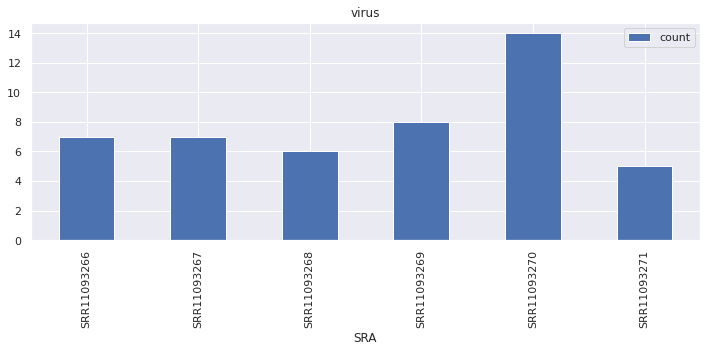

In [67]:
ax=df.plot(x='SRA', y='count', kind='bar',figsize=(12,4))
ax.set_title(s_name, fontsize=12)
plt.show()

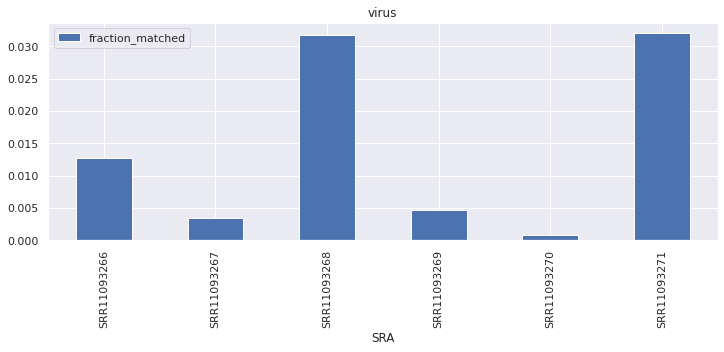

In [68]:
ax=df.plot(x='SRA', y='fraction_matched', kind='bar',figsize=(12,4))
ax.set_title(s_name, fontsize=12)
plt.show()

### Top nt database contigs matches per SRA

In [69]:
def get_sra_dict(sra):
    total_dict={}
    asc_desc={}
    accessions, descriptions, counts, total=get_asc_descr_count(sra)
    for asc,desc,cnt in zip(accessions,descriptions, counts):
        if asc in total_dict:
            total_dict[asc]+=int(cnt)
        else:
            total_dict[asc]=int(cnt)
        if asc not in asc_desc:
            asc_desc[asc]=desc
    return total_dict, asc_desc

In [70]:
for sra in sra_list:
    print(f'{sra}, number of contig matches to nt database: {len(asc_desc)}')
    total_dict, asc_desc= get_sra_dict(sra) 
    print_top_n_sp(total_dict, max_num=50)
    print('\n')

SRR11093266, number of contig matches to nt database: 12148
Pangolin coronavirus isolate PCoV_GX-P1E, complete genome :  117
Pangolin coronavirus isolate PCoV_GX-P2V, complete genome :  95
Pangolin coronavirus isolate PCoV_GX-P4L, complete genome :  90
Pangolin coronavirus isolate PCoV_GX-P5L, complete genome :  74
Pangolin coronavirus isolate PCoV_GX-P5E, complete genome :  72
Pangolin coronavirus isolate PCoV_GX-P3B genomic sequence :  72
Lutra lutra genome assembly, chromosome: 16 :  2
Manis javanica isolate MP_PG03-UM mitochondrion, complete genome :  1
Mus musculus clone contig 1 chromocenter region genomic sequence :  1
Mus musculus clone contig 5 chromocenter region genomic sequence :  1
PREDICTED: Ovis aries collagen alpha-1(III) chain-like (LOC114112644), mRNA :  1
Staphylococcus aureus strain WH3018 chromosome :  1
Staphylococcus aureus strain WH9628 chromosome :  1
PREDICTED: Marmota flaviventris 28S ribosomal RNA (LOC117794687), rRNA :  1
PREDICTED: Manis pentadactyla uncha

### Get specific contigs matching a species/name

In [71]:
def write_contigs(sra, match_names): 
    accessions, descriptions, counts, total=get_asc_descr_count(sra)
    asc_matches=[]
    for m in match_names:
        for a,d in zip(accessions, descriptions):
            if m.lower() in d.lower():
                asc_matches.append(a)
    gi_matches=[]
    for a in asc_matches:
        idx=ACCESSIONS.index(a)
        gi=GIS[idx]
        gi_matches.append(gi)
    contigs=[]
    path = BASE_PATH+sra+'/magic_blast/'
    subset_f = open(path+f'{sra}_{match_names[0].replace(" ", "_")}_subset_{f_contigs_file_tail}', 'w')
    with open(path+f'{sra}{f_contigs_file_tail}', 'r') as f:
        lines = [line for line in f]
        for line in lines:
            for gi in gi_matches:
                if gi in line: 
                    parts=line.split('\t')
                    idx=GIS.index(gi)
                    asc=ACCESSIONS[idx]
                    t=TITLES[idx]
                    ps=parts[:2]
                    pe=parts[3:]
                    ps.append(asc+' '+t.rstrip('\n'))
                    parts=ps+pe
                    p='\t'.join(parts)
                    subset_f.write(p)
    subset_f.close()

In [72]:
set_accessions() #time consuming, comment out if already ran
assert ACCESSIONS is not None

In [73]:
match_names=['vector']
for sra in sra_list:
    write_contigs(sra, match_names)